# Loading FIles

In [1]:
import pandas as pd
import glob
import os

# Specify the path to the directory containing all the CSV files
directory_path = 'Outliers/*.csv'

# Expected number of columns based on the provided structure
expected_columns = 13

# Initialize an empty list to store each DataFrame
dataframes_list = []

# Loop through each file path, read the file, and append to the list if it matches the expected structure
for file_path in glob.glob(directory_path):
    df = pd.read_csv(file_path, delimiter='\t', header=None)
    
    # Check if the DataFrame has the expected number of columns
    if df.shape[1] == expected_columns:
        # Extract file name without extension as Sample_ID
        sample_id = os.path.splitext(os.path.basename(file_path))[0]
        # Insert Sample_ID column at the first position
        df.insert(0, 'Sample_ID', sample_id)
        dataframes_list.append(df)
    else:
        print(f"Warning: The file {file_path} does not match the expected format and was skipped.")

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dataframes_list, ignore_index=True)

# Define column headings, including the new Sample_ID column at the start
column_headings = [
    "Sample_ID", 'Start_Position', 'Read_Orientation_1', 'End_position', 
    'Read_Orientation_2', 'Num_reads_aligned', 'read_width','Consequence', 
    'Proband_1', 'Proband_2', 'Parent1_1', 'Parent1_2', 'Parent2_1', 'Parent2_2'
]

# Assign column headings to the combined DataFrame
combined_df.columns = column_headings

# Display the shape of the combined DataFrame to verify
print(f"Combined DataFrame Shape: {combined_df.shape}")

# Optionally, save the combined DataFrame to a new CSV file
combined_df.to_csv('Outliers.csv', index=False)


Combined DataFrame Shape: (739245, 14)


In [4]:
import pandas as pd
import glob
import os

# Specify the paths to both directories containing the CSV files
directory_path_1 = 'Raw_HIs/*.csv'
directory_path_2 = 'Raw_NDMs/*.csv'


# Expected number of columns based on the provided structure
expected_columns = 13

# Function to process CSV files from a given directory and save to a CSV file
def process_directory(directory_path, output_filename):
    # Initialize an empty list to store each DataFrame
    dataframes_list = []
    
    # Loop through each file in the directory
    for file_path in glob.glob(directory_path):
        df = pd.read_csv(file_path, delimiter='\t', header=None)
        
        # Check if the DataFrame has the expected number of columns
        if df.shape[1] == expected_columns:
            # Extract file name without extension as Sample_ID
            sample_id = os.path.splitext(os.path.basename(file_path))[0]
            # Insert Sample_ID column at the first position
            df.insert(0, 'Sample_ID', sample_id)
            dataframes_list.append(df)
        else:
            print(f"Warning: The file {file_path} does not match the expected format and was skipped.")
    
    # Concatenate all DataFrames in the list into a single DataFrame
    combined_df = pd.concat(dataframes_list, ignore_index=True)
    
    # Define column headings, including the new Sample_ID column at the start
    column_headings = [
        "Sample_ID", 'Start_Position', 'Read_Orientation_1', 'End_position', 
        'Read_Orientation_2', 'Num_reads_aligned', 'read_width','Consequence', 
        'Proband_1', 'Proband_2', 'Parent1_1', 'Parent1_2', 'Parent2_1', 'Parent2_2'
    ]
    
    # Assign column headings to the combined DataFrame
    combined_df.columns = column_headings
    
    # Save the combined DataFrame to the specified output CSV file
    combined_df.to_csv(output_filename, index=False)
    print(f"Combined CSV saved to: {output_filename}")

# Process each directory independently and save to separate CSV files
process_directory(directory_path_1, 'HI_combined.csv')
process_directory(directory_path_2, 'NDM_combined.csv')




Combined CSV saved to: HI_combined.csv
Combined CSV saved to: NDM_combined.csv


# BarPlot to Identify Outliers

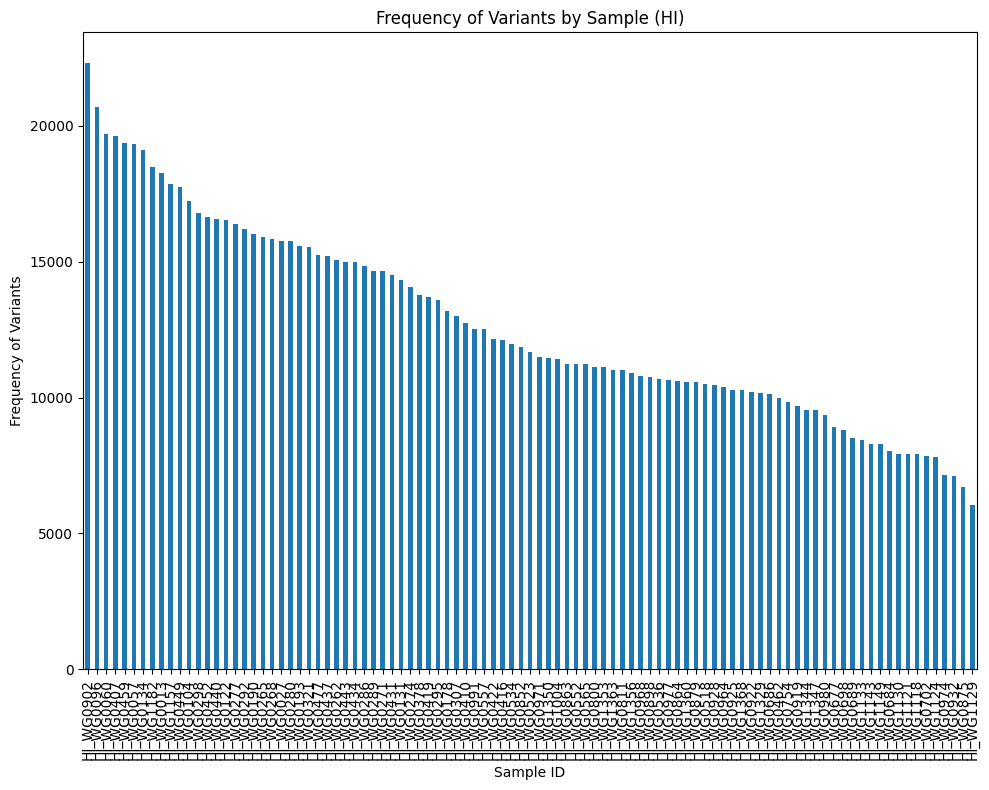

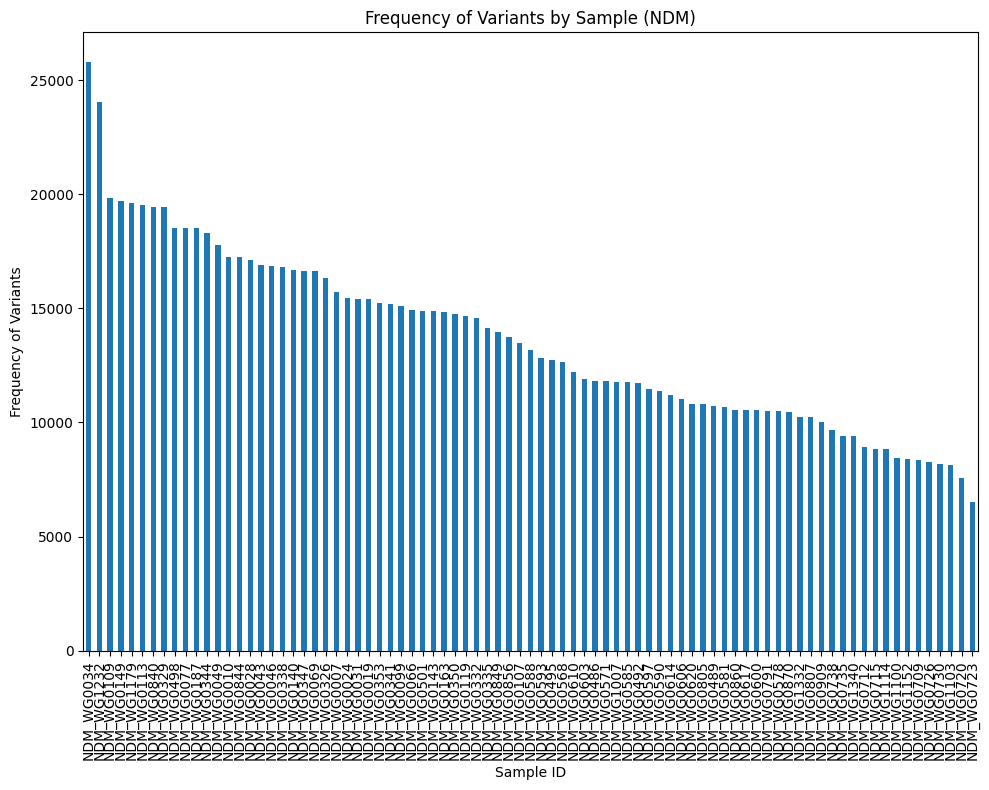

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to generate a bar plot for the given CSV file
def generate_plot_from_csv(csv_file, plot_title):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Calculate the frequency of rows (variants) for each sample
    sample_counts = df['Sample_ID'].value_counts()
    
    # Create the bar plot
    plt.figure(figsize=(10, 8))
    sample_counts.plot(kind='bar')
    plt.title(plot_title)
    plt.xlabel('Sample ID')
    plt.ylabel('Frequency of Variants')
    plt.xticks(rotation=90)  # Rotate labels to make them readable
    plt.tight_layout()  # Adjust layout to not cut off labels
    
    # Show the plot
    plt.show()

# Generate plots for both CSV files
generate_plot_from_csv('HI_combined.csv', 'Frequency of Variants by Sample (HI)')
generate_plot_from_csv('NDM_combined.csv', 'Frequency of Variants by Sample (NDM)')


# BarPlot Proportion of Consequences

In [17]:
import pandas as pd

# Function to adjust consequences in a CSV file
def adjust_consequences_in_csv(input_csv, output_csv):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(input_csv)
    
    # Define the consequence mapping
    consequence_mapping = {
        'Deletion_left_edge': 'deletion',
        'Deletion_right_edge': 'deletion',
        'Duplication_left_edge': 'duplication',
        'Duplication_right_edge': 'duplication',
        'Inversion_inner_left': 'inversion',
        'Inversion_inner_right': 'inversion',
        'Inversion_outer_left': 'inversion',
        'Inversion_outer_right': 'inversion'
    }
    
    # Replace the specific consequences with the broader labels
    df['Consequence'] = df['Consequence'].replace(consequence_mapping)
    
    # Save the adjusted DataFrame to a new CSV file
    df.to_csv(output_csv, index=False)
    
    print(f"Consequences in {input_csv} have been adjusted and saved to {output_csv}")

# Example usage
adjust_consequences_in_csv('Outliers.csv', 'Outliers.csv')





Consequences in Outliers.csv have been adjusted and saved to Outliers.csv


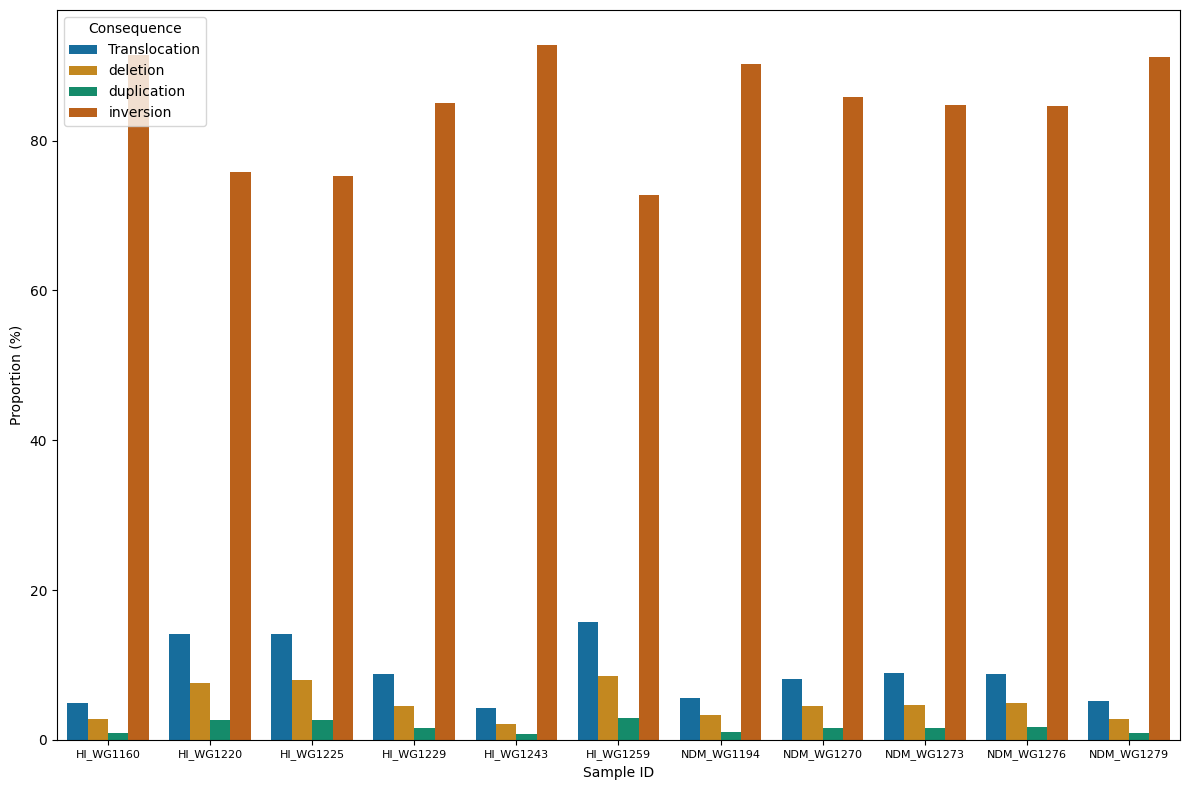

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
data = pd.read_csv('Outliers.csv')

# Group by Sample_ID and Consequence_0, then count the occurrences
grouped_data = data.groupby(['Sample_ID', 'Consequence']).size().reset_index(name='Count')

# Calculate the proportion of each Consequence_0 within each Sample_ID
grouped_data['Proportion'] = grouped_data.groupby('Sample_ID')['Count'].transform(lambda x: x / x.sum() * 100)

# Create a barplot of the aggregated proportions using a colorblind-friendly palette
plt.figure(figsize=(12, 8))
sns.barplot(x='Sample_ID', y='Proportion', hue='Consequence', data=grouped_data, palette='colorblind')

# Add labels and title
plt.xlabel('Sample ID')
plt.ylabel('Proportion (%)')


# Rotate x-axis labels for better readability and adjust fontsize
plt.xticks(fontsize=8)  # Adjust fontsize here

# Show the plot
plt.tight_layout()
plt.show()